In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_2018 = pd.read_excel("cleaned 2018.xlsx")
df_2019 = pd.read_excel("cleaned 2019.xlsx")
df_2020 = pd.read_excel("cleaned 2020.xlsx")
df_2021 = pd.read_excel("cleaned 2021.xlsx")

In [3]:
df_2018.dropna(inplace=True)
df_2018.reset_index(drop=True, inplace=True)

df_2019.dropna(inplace=True)
df_2019.reset_index(drop=True, inplace=True)

df_2020.dropna(inplace=True)
df_2020.reset_index(drop=True, inplace=True)

df_2021.dropna(inplace=True)
df_2021.reset_index(drop=True, inplace=True)

In [4]:
# Adding column year

Year = ["2018" for i in range(df_2018.shape[0])]
df_2018["Year"] = Year

Year = ["2019" for i in range(df_2019.shape[0])]
df_2019["Year"] = Year

Year = ["2020" for i in range(df_2020.shape[0])]
df_2020["Year"] = Year

Year = ["2021" for i in range(df_2021.shape[0])]
df_2021["Year"] = Year

In [5]:
data = [df_2018, df_2019, df_2020, df_2021]
df_main = pd.concat(data)

In [6]:
df_main.isnull().any()

Company/Brand    False
Sector           False
Stage            False
Amount($)        False
What it does     False
City             False
Sub city          True
Year             False
Founded           True
Founders          True
Investor          True
dtype: bool

## Statistics 

In [7]:
df_main.describe()

,Amount($)
count,2.778000e+03
mean,1.301979e+08
std,3.181630e+09
min,0.000000e+00
25%,5.000000e+05
50%,3.000000e+06
75%,1.194350e+07
max,1.500000e+11


array([[<AxesSubplot:title={'center':'Amount($)'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

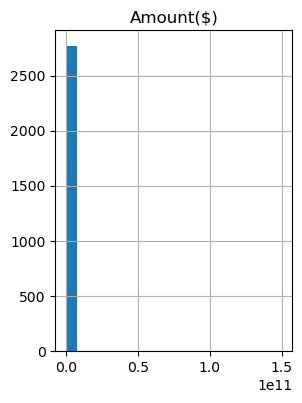

In [8]:
df_main.hist(
    figsize=(15, 15),
    layout=(3,4),
    bins=20
)

## A company with lagest amount of investment

In [9]:
large_com = df_main.sort_values(by='Amount($)', ascending=False).head(1)

In [10]:
large_com

,Company/Brand,Sector,Stage,Amount($),What it does,City,Sub city,Year,Founded,Founders,Investor
73,Alteria Capital,FinTech,Debt,1.500000e+11,Alteria Capital is a Venture debt firm .,Mumbai,NaN,2021,2018,Vinod Murali,unkown


## Top 10 Companies with high Amount

In [20]:
top_10_com = df_main.groupby("Company/Brand")["Amount($)"].sum().reset_index()

In [21]:
top_10_com = top_10_com.sort_values(by = "Amount($)", ascending = False).head(10)

In [22]:
top_10_com

,Company/Brand,Amount($)
68,Alteria Capital,1.500000e+11
1515,Reliance Retail Ventures Ltd,7.000000e+10
1965,Vistara,2.000000e+10
892,Indiabulls Ventures,1.539200e+10
703,Fusion Microfinance,5.200000e+09
341,ClearTax,4.000000e+09
1677,Snowflake,3.000000e+09
1256,Ninjacart,2.540000e+09
23,APAC Financial Services,2.500000e+09
868,INDwealth,2.200000e+09


In [23]:
top_10_com["Amount($)"] = top_10_com["Amount($)"].apply(lambda x : "{:.0f}".format(x) )

In [29]:
top_10_com["Amount($)"] = top_10_com["Amount($)"].astype(float)

In [30]:
type(top_10_com["Amount($)"])

pandas.core.series.Series

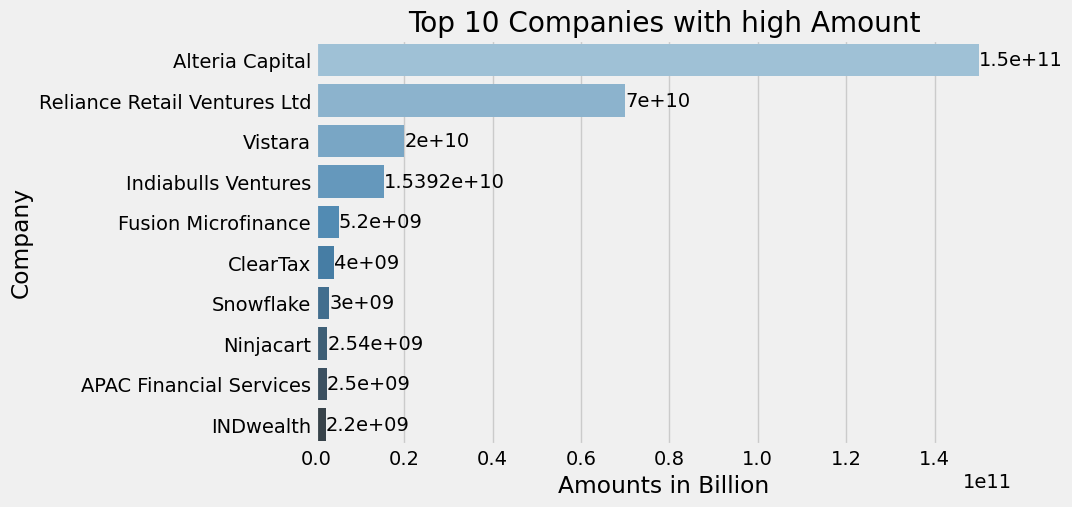

In [31]:
plt.figure(figsize=(8,5))
plt.title("Top 10 Companies with high Amount")
plt.style.use("fivethirtyeight")
fig = sns.barplot(y = "Company/Brand", x = "Amount($)", palette = "Blues_d", data = top_10_com)
fig.set(xlabel="Amounts in Billion", ylabel="Company")
for i in fig.containers:
    fig.bar_label(i,)
plt.show()

## Top 10 cities with high amount

In [32]:
top_cities = df_main.sort_values(by="Amount($)", ascending=False).head(10)

In [33]:
top_cities["Amount($)"]

73     1.500000e+11
274    7.000000e+10
420    2.000000e+10
419    1.539200e+10
156    5.200000e+09
421    4.000000e+09
311    3.000000e+09
127    2.500000e+09
116    2.500000e+09
411    2.200000e+09
Name: Amount($), dtype: float64

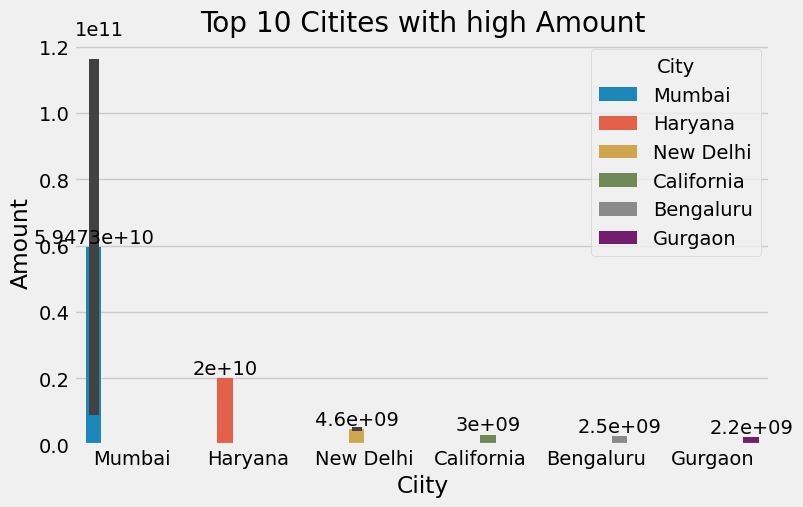

In [34]:
plt.figure(figsize=(8,5))
plt.title("Top 10 Citites with high Amount")
fig = sns.barplot(x = top_cities.City, data = top_cities, y = top_cities["Amount($)"], hue="City")

fig.set(xlabel="Ciity", ylabel="Amount")
for i in fig.containers:
    fig.bar_label(i,)
plt.show()

## Top 5 Cities with high number of Companies

In [35]:
a = df_main.groupby("City")["Company/Brand"].count().reset_index()
a = a.sort_values("Company/Brand", ascending=False)

In [36]:
a = a.head(5)

In [37]:
a

,City,Company/Brand
9,Bangalore,887
77,Mumbai,472
43,Gurugram,239
80,New Delhi,232
23,Chennai,106


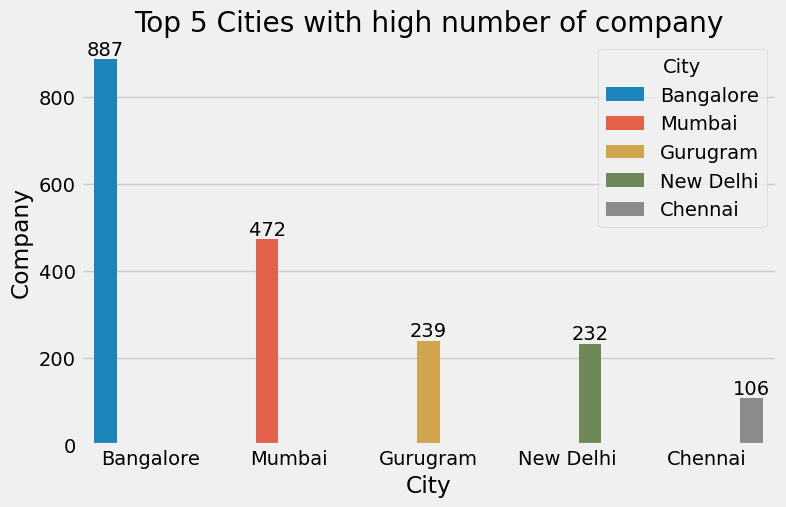

In [38]:
plt.figure(figsize=(8,5))
plt.title("Top 5 Cities with high number of company")
fig = sns.barplot(x = "City", data = a, y = "Company/Brand", hue="City")

fig.set(xlabel="City", ylabel="Company")
for i in fig.containers:
    fig.bar_label(i,)
plt.show()

In [39]:
b = df_main.groupby("Sector").count().reset_index()

In [40]:
b = b.sort_values(by="City", ascending=False)

In [41]:
b = b.head(5)

In [42]:
b

,Sector,Company/Brand,Stage,Amount($),What it does,City,Sub city,Year,Founded,Founders,Investor
260,FinTech,175,175,175,175,175,2,175,173,173,173
219,EdTech,146,146,146,146,146,6,146,140,140,140
263,Financial Services,88,88,88,88,88,26,88,62,62,62
264,Fintech,73,73,73,73,73,0,73,73,73,73
209,E-commerce,73,73,73,73,73,0,73,73,73,73


#### I have seen that there is one value which is same but differ because of one letter being uppercase. so i have to clean it first.

In [43]:
df_main["Sector"] = df_main["Sector"].replace('Fintech', "FinTech")
df_main["Sector"] = df_main["Sector"].replace('Edtech', "EdTech")

In [44]:
b = df_main.groupby("Sector").count().reset_index()
b = b.sort_values(by="City", ascending=False)
b = b.head(5)


In [45]:
b

,Sector,Company/Brand,Stage,Amount($),What it does,City,Sub city,Year,Founded,Founders,Investor
259,FinTech,248,248,248,248,248,2,248,246,246,246
219,EdTech,215,215,215,215,215,6,215,209,209,209
262,Financial Services,88,88,88,88,88,26,88,62,62,62
209,E-commerce,73,73,73,73,73,0,73,73,73,73
53,Automotive,54,54,54,54,54,18,54,36,36,36


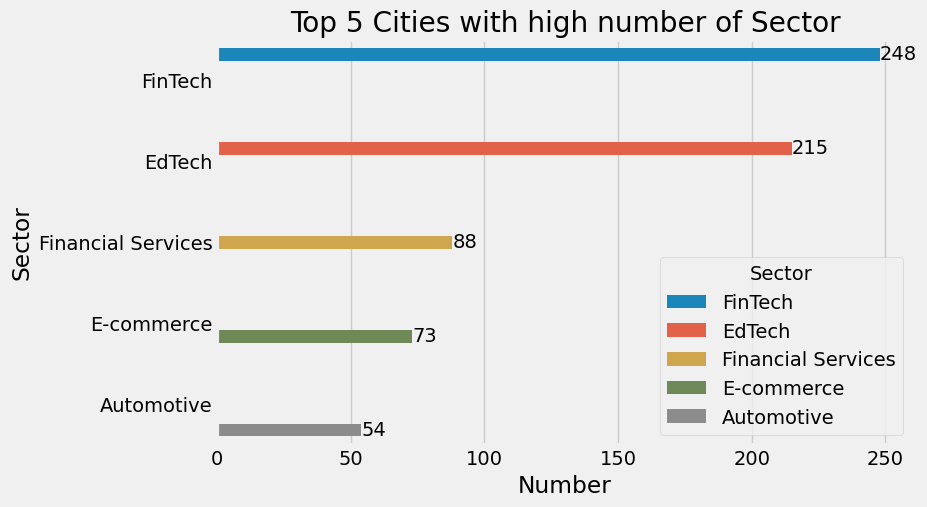

In [46]:
plt.figure(figsize=(8,5))
plt.title("Top 5 Cities with high number of Sector")
fig = sns.barplot(y = "Sector", data = b, x = "Company/Brand", hue="Sector")

fig.set(xlabel="Number", ylabel="Sector")
for i in fig.containers:
    fig.bar_label(i,)
plt.show()

In [47]:
c = df_main.groupby("Year").sum()
c = c.sort_values(by="Year").reset_index()
c

,Year,Amount($)
0,2018,8.717859e+10
1,2019,3.336433e+09
2,2020,9.136121e+10
3,2021,1.798134e+11


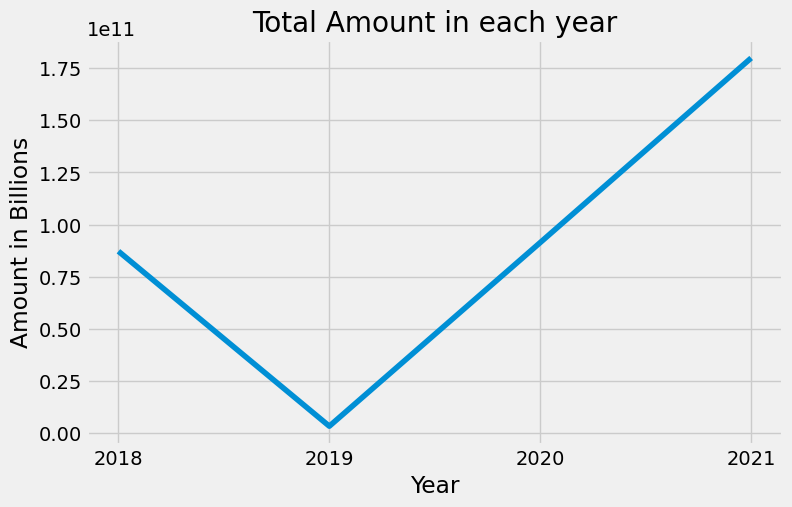

In [48]:
plt.figure(figsize=(8,5))
fig = sns.lineplot(data=c, x="Year", y="Amount($)")

plt.title("Total Amount in each year")
plt.ylabel("Amount in Billions")

for i in fig.containers:
    fig.bar_label(i,)
    

plt.show()

## Stages in each year

In [73]:
d = df_main.groupby(by="Year")["Stage"].count().reset_index()
d

,Year,Stage
0,2018,525
1,2019,89
2,2020,958
3,2021,1206


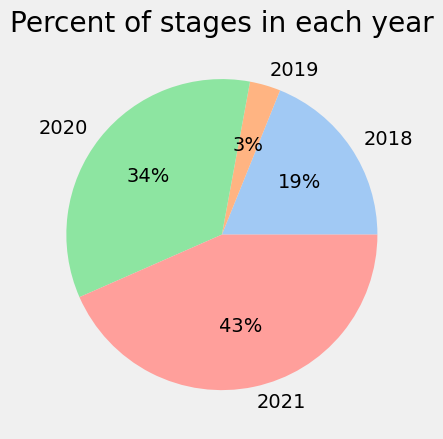

In [77]:
data = d.Stage
labels = d.Year

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Percent of stages in each year")
plt.show()

In [78]:
df_main

,Company/Brand,Sector,Stage,Amount($),What it does,City,Sub city,Year,Founded,Founders,Investor
0,TheCollegeFever,Brand Marketing,Seed,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",Bangalore,Karnataka,2018,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,40000000.0,A startup which aggregates milk from dairy far...,Mumbai,Maharashtra,2018,NaN,NaN,NaN
2,MyLoanCare,Credit,Series A,65000000.0,Leading Online Loans Marketplace in India,Gurgaon,Haryana,2018,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,2000000.0,PayMe India is an innovative FinTech organizat...,Noida,Uttar Pradesh,2018,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,0.0,Eunimart is a one stop solution for merchants ...,Hyderabad,Andhra Pradesh,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1201,Gigforce,Staffing & Recruiting,Pre-series A,3000000.0,A gig/on-demand staffing company.,Gurugram,NaN,2021,2019,"Chirag Mittal, Anirudh Syal",Endiya Partners
1202,Vahdam,Food & Beverages,Series D,20000000.0,VAHDAM is among the world’s first vertically i...,New Delhi,NaN,2021,2015,Bala Sarda,IIFL AMC
1203,Leap Finance,Financial Services,Series C,55000000.0,International education loans for high potenti...,Bangalore,NaN,2021,2019,"Arnav Kumar, Vaibhav Singh",Owl Ventures
1204,CollegeDekho,EdTech,Series B,26000000.0,"Collegedekho.com is Student’s Partner, Friend ...",Gurugram,NaN,2021,2015,Ruchir Arora,"Winter Capital, ETS, Man Capital"
